In [13]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
df_train = pd.read_csv('train_data_clean.csv')

df_test = pd.read_csv('test_data_clean.csv')

display(df_train.head())
display(df_test.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [9]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

display(X.shape, y.shape)

(891, 8)

(891,)

In [10]:
# train, test, validation split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)
display(X_val.shape, y_val.shape)

(623, 8)

(623,)

(187, 8)

(187,)

(81, 8)

(81,)

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7486631016042781


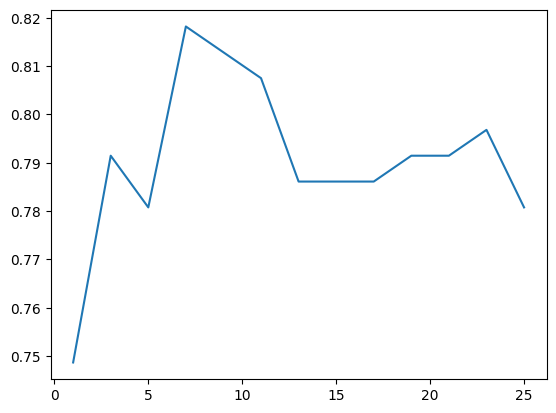

In [12]:
k_range = list(range(1,26,2))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.show()

In [14]:
param_grid = {'n_neighbors': list(range(1,26,2))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score= False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]},
             scoring='accuracy')

In [15]:
grid.cv_results_['mean_test_score']

array([0.72500624, 0.78011236, 0.79021223, 0.79022472, 0.80031211,
       0.79583021, 0.80813983, 0.80364544, 0.80254682, 0.80254682,
       0.79240949, 0.80476904, 0.79915106])

In [16]:
grid.best_score_

0.8081398252184769

In [17]:
grid.best_params_

{'n_neighbors': 13}